In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/Iowa_Liquor_Sales.csv', 
                 dtype={"Invoice/Item Number": 'object', "Date": 'object', "Store Number": "int64",
                       "Store Name": 'object', "Address": 'object', "City": 'object', "Zip Code": 'object',
                       "Store Location": 'object', "County Number": 'float64', "County": 'object', "Category": 'float64',
                       "Category Name": 'object', "Vendor Number": 'float64', "Vender Name": 'object',
                       "Item Number": 'object', "Item Description": 'object', "Pack": 'int64', "Bottle Volumne (ml)": 'int64',
                       "State Bottle Cost": 'float64', "State Bottle Retail": 'float64', "Bottles Sold": 'int64',
                       "Sale (Dollars)": 'float64', "Volume Sold(Liters)": 'float64', "Volume Sold (Gallons)": 'float64'})
# Date column to be datetim64
# Zip code column includes non number type
# Non value should be in float64 type
# Item Number column includes non number type
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Invoice/Item Number              object
Date                     datetime64[ns]
Store Number                      int64
Store Name                       object
Address                          object
City                             object
Zip Code                         object
Store Location                   object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                   float64
Vendor Name                      object
Item Number                      object
Item Description                 object
Pack                              int64
Bottle Volume (ml)                int64
State Bottle Cost               float64
State Bottle Retail             float64
Bottles Sold                      int64
Sale (Dollars)                  float64
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [3]:
df.shape

(23154845, 24)

In [4]:
df.isna().sum().sort_values(ascending=False)

Store Location           2282212
County Number             156873
County                    156871
Zip Code                   80113
Address                    80069
City                       80068
Category Name              25040
Category                   16974
Sale (Dollars)                10
State Bottle Retail           10
State Bottle Cost             10
Vendor Number                  9
Vendor Name                    7
Bottle Volume (ml)             0
Volume Sold (Liters)           0
Bottles Sold                   0
Invoice/Item Number            0
Pack                           0
Item Description               0
Item Number                    0
Date                           0
Store Name                     0
Store Number                   0
Volume Sold (Gallons)          0
dtype: int64

In [5]:
# lowercase string values for data cleaning
for col in ['Store Name', 'Address', 'City', 'County', 'Category Name', 'Vendor Name', 'Item Description']:
    df[col] = df[col].str.lower()

In [6]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S24032900031,2015-02-16,3385,sam's club 8162 / cedar rapids,2605 blairs ferry rd ne,cedar rapids,52402,POINT (-91.67969 42.031819),57.0,linn,1041100.0,american dry gins,55.0,sazerac north america,29287,barton gin,12,1000,3.92,5.88,24,141.12,24.00,6.34
1,S25392600010,2015-04-30,5034,liquor tobacco & groceries,18 n monroe ave,mason city,50401,POINT (-93.208614 43.152301),17.0,cerro gordo,1011200.0,straight bourbon whiskies,434.0,luxco-st louis,18196,ezra brooks 50 mo ky sour mash bourbon,12,750,6.84,10.26,12,123.12,9.00,2.38
2,S08041400024,2012-10-01,2500,hy-vee food store #1 / ames,3800 w lincoln way,ames,50010,NaN,85.0,story,1081300.0,peppermint schnapps,434.0,luxco-st louis,81406,thunder 101 peppermint schnapps,12,750,6.50,9.75,12,117.00,9.00,2.38
3,S13626800019,2013-07-30,4203,liquor and tobacco outlet /,620 w bremer ave,waverly,50677,POINT (-92.47898 42.725694),9.0,bremer,1062200.0,puerto rico & virgin islands rum,434.0,luxco-st louis,45276,paramount white rum,12,750,3.85,5.77,12,69.24,9.00,2.38
4,S20264600081,2014-07-23,4509,a j's liquor ii,2515 chamberlain,ames,50010,POINT (-93.650838 42.021461),85.0,story,1032080.0,imported vodka,277.0,stoli group,34729,stolichnaya elit vodka,6,750,29.99,44.99,1,44.99,0.75,0.20


In [7]:
df_store = df[['Store Number', 'Store Name', 'Address', 'City', 'Zip Code', 'Store Location', 'County Number', 'County']]

> - Fill in NA values

In [8]:
df_store.isna().sum()

Store Number            0
Store Name              0
Address             80069
City                80068
Zip Code            80113
Store Location    2282212
County Number      156873
County             156871
dtype: int64

In [9]:
for col in ['Store Name', 'Address', 'City', 'Zip Code', 'Store Location', 'County Number', 'County']:

    # for missing values in the column, find if there's existing value in another observation
    for SN in df_store[df_store[col].isna()]['Store Number'].unique():

        # Does another observation have same store number with column information?
        try:
            actual_value = df_store[(df_store['Store Number'] == SN) & (df_store[col].notnull())][col].unique()[0]
            df_store.loc[(df_store['Store Number'] == SN) & (df_store[col].isna()), col] = actual_value

        # No reference for address
        except IndexError:
            pass
            print("Can't find ", col," information of store Number ", SN, " in other observations")
df_store.isna().sum()

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Can't find  Address  information of store Number  5320  in other observations
Can't find  Address  information of store Number  9932  in other observations
Can't find  City  information of store Number  5320  in other observations


KeyboardInterrupt: 

- Drop off the store number 5320 and 9932 as we can't find the address information
- That's 848 from 23M records

In [ ]:
df_store.drop(df_store.loc[(df_store['Store Number'] == 5320) | (df_store['Store Number'] == 9932)].index, inplace=True)
print(len(df_store))
df_store.isna().sum()

- The left Store Location and County NA values can be filled later with geocoding

> - Find values that existed more than 2 for one store number and make it one value

- 1: Store Number vs Store Name

In [ ]:
print('The number of store number is ', len(df_store['Store Number'].unique()) )
print('The number of store name is ', len(df_store['Store Name'].unique()) )

In [ ]:
# groupby store number and store name 
df_numbername = df_store.groupby(['Store Number', 'Store Name']).agg({'County':'count'}).reset_index()

# sort only duplicated store number
# It means one store number has multiple store names
df_numbername_duplicates = df_numbername[df_numbername['Store Number'].duplicated(keep = False)].sort_values(by=['Store Number'])

# unite the name for each store number
for SN in df_numbername_duplicates['Store Number'].unique():
    
    # find the store name that has the most transactions
    max_idx = df_numbername_duplicates[df_numbername_duplicates['Store Number'] == SN]['County'].idxmax()
    actual_name = df_numbername_duplicates.loc[max_idx,'Store Name']
    
    # change the names with the most frequent name per store number
    df_store.loc[(df_store['Store Number'] == SN) & (df_store['Store Name'] != actual_name), 'Store Name'] = actual_name

# different stores have same name    
print('The number of store number is ', len(df_store['Store Number'].unique()) )
print('The number of store name is ', len(df_store['Store Name'].unique()) )

- 2: Store Number vs Address

In [ ]:
# find address with the latest invoice and replace it IF the addresses are in the same county
# groupby store number, county and address 
df_numberadd = df_store.groupby(['Store Number', 'County', 'Address']).agg({'County Number':'count'}).reset_index()
df_numberadd_duplicates = df_numberadd[df_numberadd['Store Number'].duplicated(keep = False)].sort_values(by=['Store Number'])
df_numberadd_duplicates

In [ ]:
len(df_store['County'].unique())

- As the result, we have 105 unique county values when the actual should be 100 (99 counties + non value)

In [ ]:
county_unique = df_store[df_store['County'].notnull()]['County'].unique()
county_unique.sort()
print(county_unique)

buena vist >>>>>>> buena vista  
cerro gord >>>>>>> cerro gordo  
el paso >>>>>>>>>> not in Iowa  
obrien >>>>>>>>>>> o'brien  
pottawatta >>>>>>> pottawattamie  

In [ ]:
# outliers because 'el paso' county is in CO
# to be dropped off
df_store[df_store['County'] == 'el paso']

In [ ]:
# change the typo county names
df_store['County'] = df_store['County'].replace({'buena vist':'buena vista', 'cerro gord':'cerro gordo', 'obrien':"o'brien", 'pottawatta':'pottawattamie'})

# drop off 'el paso' county values
df_store.drop(df_store.loc[df_store['County'] == 'el paso'].index, inplace=True)

len(df_store['County'].unique())

- Now, retry to groupby for store number vs address with county

In [ ]:
df_numberadd = df_store.groupby(['Store Number', 'County', 'Address']).agg({'County Number':'count'}).reset_index()
df_numberadd_duplicates = df_numberadd[df_numberadd['Store Number'].duplicated(keep = False)].sort_values(by=['Store Number'])
df_numberadd_duplicates

In [ ]:
# get the latest invoice date per each store number
for SN in df_numberadd_duplicates['Store Number'].unique():
    
    # Check if the county is still same
    if len(df_numberadd_duplicates[df_numberadd_duplicates['Store Number'] == SN]['County'].unique()) == 1:

        # get the index for the latest invoice date
        max_idx = df[df['Store Number'] == SN]['Date'].idxmax()
        latest_add = df.loc[max_idx,'Address']

        # change the address with the latest
        df_store.loc[(df_store['Store Number'] == SN) & (df_store['Address'] != latest_add), 'Address'] = latest_add
    
    else:
        print(SN, 'moved to different county')

In [ ]:
# df_numberadd[df_numberadd['Store Number'].duplicated(keep = False)].sort_values(by=['Store Number'])
df_store[df_store['Store Number'] == 2656].drop_duplicates() # adams county
df_store[df_store['Store Number'] == 3461].drop_duplicates() # adair county
df_store[df_store['Store Number'] == 4067].drop_duplicates() # washington county
df_store[df_store['Store Number'] == 4320].drop_duplicates() # dallas county
df_store[df_store['Store Number'] == 4944].drop_duplicates() # warren county

In [ ]:
# change the wrong input county names
df_store.loc[(df_store['Store Number'] == 2656) & (df_store['County'] != 'adams'), 'County'] = 'adams'
df_store.loc[(df_store['Store Number'] == 3461) & (df_store['County'] != 'adair'), 'County'] = 'adair'
df_store.loc[(df_store['Store Number'] == 4067) & (df_store['County'] != 'washington'), 'County'] = 'washington'
df_store.loc[(df_store['Store Number'] == 4320) & (df_store['County'] != 'dallas'), 'County'] = 'dallas'
df_store.loc[(df_store['Store Number'] == 4944) & (df_store['County'] != 'warren'), 'County'] = 'warren'

In [ ]:
df_numberadd = df_store.groupby(['Store Number', 'County', 'Address']).agg({'County Number':'count'}).reset_index()
df_numberadd_duplicates = df_numberadd[df_numberadd['Store Number'].duplicated(keep = False)].sort_values(by=['Store Number'])
df_numberadd_duplicates

In [ ]:
# Since we checked the store number 3461 and we know that it moved in the same county, update the address for the latest one

# get the index for the latest invoice date
max_idx = df[df['Store Number'] == 3461]['Date'].idxmax()
latest_add = df.loc[max_idx,'Address']

# change the address with the latest
df_store.loc[(df_store['Store Number'] == 3461) & (df_store['Address'] != latest_add), 'Address'] = latest_add

- 3: Store Number vs City

In [ ]:
df_numberadd = df_store.groupby(['Store Number', 'City']).agg({'County Number':'count'}).reset_index()
df_numberadd_duplicates = df_numberadd[df_numberadd['Store Number'].duplicated(keep = False)].sort_values(by=['Store Number'])
df_numberadd_duplicates

- except store number 3822, 9911, it's typo errors
- 3822 : shueyville
- 9911 : grimes

In [ ]:
df_store.loc[(df_store['Store Number'] == 3822) & (df_store['City'] != 'shueyville'), 'City'] = 'shueyville'
df_store.loc[(df_store['Store Number'] == 9911) & (df_store['City'] != 'grimes'), 'City'] = 'grimes'

In [ ]:
len(df_store['City'].unique())

In [ ]:
city_unique = df_store[df_store['City'].notnull()]['City'].unique()
city_unique.sort()
print(city_unique)
# aronolds park >> arnold's park
# clearlake >> clear lake
# ft. atkinson >> fort atkinson
# grand mounds >> grand mound
# guttenburg >> guttenberg
# jewell >> jewell junction
# kellog >> kellogg
# leclaire >> le claire
# lemars >> le mars
# mt pleasant >> mount pleasant
# mt vernon >> mount vernon
# 'ottuwma' 'otumwa' >> ottumwa
# 'pleasant valley' >> bettendorf
# 'saint ansgar' >> st ansgar

In [ ]:
df_store.loc[df_store['City'] == 'arnolds park', 'City'] = "arnold's park"
df_store.loc[df_store['City'] == 'clearlake', 'City'] = "clear lake"
df_store.loc[df_store['City'] == 'ft. atkinson', 'City'] = "fort atkinson"
df_store.loc[df_store['City'] == 'grand mounds', 'City'] = "grand mound"
df_store.loc[df_store['City'] == 'guttenburg', 'City'] = "guttenberg"
df_store.loc[df_store['City'] == 'jewell', 'City'] = "jewell junction"
df_store.loc[df_store['City'] == 'kellog', 'City'] = "kellogg"
df_store.loc[df_store['City'] == 'leclaire', 'City'] = "le claire"
df_store.loc[df_store['City'] == 'lemars', 'City'] = "le mars"
df_store.loc[df_store['City'] == 'mt pleasant', 'City'] = "mount pleasant"
df_store.loc[df_store['City'] == 'mt vernon', 'City'] = "mount vernon"
df_store.loc[(df_store['City'] == 'ottuwma') | (df_store['City'] == 'otumwa'), 'City'] = "ottumwa"
df_store.loc[df_store['City'] == 'pleasant valley', 'City'] = "bettendorf"
df_store.loc[df_store['City'] == 'saint ansgar', 'City'] = "st ansgar"

In [ ]:
len(df_store['City'].unique())

- 4: Store Number vs Zip Code

In [ ]:
df_numberadd = df_store.groupby(['Store Number', 'Zip Code']).agg({'County Number':'count'}).reset_index()
df_numberadd_duplicates = df_numberadd[df_numberadd['Store Number'].duplicated(keep = False)].sort_values(by=['Store Number'])
df_numberadd_duplicates

- 2514 - 52302  
- 2656 - 50841  
- 3805 - 52804  
- 4457 - 52246  
- 5091 - 52761  
- 5097 - 52403  
- 9911 - 50111  

In [ ]:
df_store.loc[(df_store['Store Number'] == 2514) & (df_store['Zip Code'] != 52302), 'Zip Code'] = 52302
df_store.loc[(df_store['Store Number'] == 2656) & (df_store['Zip Code'] != 50841), 'Zip Code'] = 50841
df_store.loc[(df_store['Store Number'] == 3805) & (df_store['Zip Code'] != 52804), 'Zip Code'] = 52804
df_store.loc[(df_store['Store Number'] == 4457) & (df_store['Zip Code'] != 52246), 'Zip Code'] = 52246
df_store.loc[(df_store['Store Number'] == 5091) & (df_store['Zip Code'] != 52761), 'Zip Code'] = 52761
df_store.loc[(df_store['Store Number'] == 5097) & (df_store['Zip Code'] != 52403), 'Zip Code'] = 52403
df_store.loc[(df_store['Store Number'] == 9911) & (df_store['Zip Code'] != 50111), 'Zip Code'] = 50111

In [ ]:
df_numberadd = df_store.groupby(['Store Number', 'Zip Code']).agg({'County Number':'count'}).reset_index()
df_numberadd_duplicates = df_numberadd[df_numberadd['Store Number'].duplicated(keep = False)].sort_values(by=['Store Number'])
df_numberadd_duplicates

In [ ]:
df_store.isna().sum()

In [ ]:
df_store = df_store.drop(columns = ['Store Location', 'County Number'])

In [ ]:
len(df['Store Number'].unique())

In [ ]:
# we have removed 3 store numbers, so this is a good sign
df_store.drop_duplicates()

In [ ]:
store_db = df_store.drop_duplicates().reset_index()
store_db = store_db.drop(columns = ['index'])

- input geo information with lat and lng

In [ ]:
import json
import time
import urllib.error
import urllib.parse
import urllib.request

# The maps_key defined below isn't a valid Google Maps API key.
# You need to get your own API key.
# See https://developers.google.com/maps/documentation/timezone/get-api-key
# API_KEY = 
GEOCODE_URL = "https://maps.googleapis.com/maps/api/geocode/json"

In [ ]:
def geo_lat_lng(address):
    
    target_key = 'geometry'
    target_subkey = 'location'
    
    # Join the parts of the URL together into one string.
    params = urllib.parse.urlencode(
        {"address": address, "key": API_KEY,}
    )
    url = f"{GEOCODE_URL}?{params}"

    while True:
        try:
            # Get the API response.
            response = urllib.request.urlopen(url)
        except urllib.error.URLError:
            pass  # Fall through to the retry loop.
        else:
            # If we didn't get an IOError then parse the result.
            result = json.load(response)

            if result["status"] == "OK":
                return result["results"][0].get(target_key)[target_subkey]
            elif result["status"] != "UNKNOWN_ERROR":
                # Many API errors cannot be fixed by a retry, e.g. INVALID_REQUEST or
                # ZERO_RESULTS. There is no point retrying these requests.
                raise Exception(result["error_message"])

In [ ]:
def geo_county(address):
    
    target_key = 'address_components'
    target_subkey = 3
    
    # Join the parts of the URL together into one string.
    params = urllib.parse.urlencode(
        {"address": address, "key": API_KEY,}
    )
    url = f"{GEOCODE_URL}?{params}"

    while True:
        try:
            # Get the API response.
            response = urllib.request.urlopen(url)
        except urllib.error.URLError:
            pass  # Fall through to the retry loop.
        else:
            # If we didn't get an IOError then parse the result.
            result = json.load(response)

            if result["status"] == "OK":
                temp_result = result["results"][0].get(target_key)
                temp_df = pd.DataFrame.from_dict(temp_result)
                return temp_df[temp_df['long_name'].str.contains('County')]['long_name']
            elif result["status"] != "UNKNOWN_ERROR":
                # Many API errors cannot be fixed by a retry, e.g. INVALID_REQUEST or
                # ZERO_RESULTS. There is no point retrying these requests.
                raise Exception(result["error_message"])

In [ ]:
# combine address + city + state for geocode
store_db['Geo Address'] = store_db['Address'] + " "+ store_db['City'] + " IA"
store_db

In [ ]:
# lat 41.8780025, lng -93.097702 means it couldn't find the actual address but put center(?) coordinate of Iowa
geo_record = []
for addr in store_db['Geo Address']:
    print(addr)
    geo_record.append(geo_lat_lng(addr))

In [ ]:
geo_coordinates = pd.DataFrame.from_dict(geo_record)

In [ ]:
store_db = store_db.merge(geo_coordinates, how='outer', left_index=True, right_index=True)
store_db

In [ ]:
store_db['Address'].value_counts()
# need to figure out 1) whether the address has two stores, 2) what store numbers are for current open

In [ ]:
store_db.isna().sum()

- IF YOU RUN THIS NOTEBOOK FROM THE BEGINNING AGAIN, YOU MUST ADD A LINE TO FILL THE COUNTY NA VALUE, IT SHOULD BE 'cerro gordo'

In [ ]:
store_db.isna().sum()

In [ ]:
# round up the coordinates
store_db['lat'] = round(store_db['lat'], 5)
store_db['lng'] = round(store_db['lng'], 5)

In [ ]:
# lat should be in range between 40 and 44
# lng should be in range between -97 and -90
print(store_db['lat'].max())
print(store_db['lat'].min())
print(store_db['lng'].max())
print(store_db['lng'].min())

In [ ]:
store_db[(store_db['lat'] > 44) | (store_db['lat'] < 40) | (store_db['lng'] > -90) | (store_db['lng'] < -97)]

3782 lat:42.779662 lng: -91.1018998  
5153 43.3009173 -96.4339502  
4525 address = 79 South St, lat 42.8231254 lng -96.5630345  
4607 42.7730642 -91.1020122  
4672 42.7823886 -91.1005074  
4008 42.3882855 -95.8669365  
5814 42.5665731 -90.7206561  

In [ ]:
# when geocode couldn't find the actual coordinate, it will return the below values
print(round(41.8780025, 5))
print(round(-93.097702, 5))

In [ ]:
store_db[(store_db['lat'] == 41.878) & (store_db['lng'] == -93.0977)]

2560 42.037154 -91.5745887
4101 41.8994236 -93.5317064

In [ ]:
store_db.loc[store_db['Store Number'] == 3782, ['lat', 'lng']] = [42.77966, -91.1019]
store_db.loc[store_db['Store Number'] == 5153, ['lat', 'lng']] = [43.30092, -96.43395]
store_db.loc[store_db['Store Number'] == 4525, ['lat', 'lng']] = [42.82313, -96.56303]
store_db.loc[store_db['Store Number'] == 4607, ['lat', 'lng']] = [42.77306, -91.10201]
store_db.loc[store_db['Store Number'] == 4672, ['lat', 'lng']] = [42.78239, -91.10051]
store_db.loc[store_db['Store Number'] == 4008, ['lat', 'lng']] = [42.38829, -95.86694]
store_db.loc[store_db['Store Number'] == 5814, ['lat', 'lng']] = [42.56657, -90.72066]
store_db.loc[store_db['Store Number'] == 2560, ['lat', 'lng']] = [42.03715, -91.57459]
store_db.loc[store_db['Store Number'] == 4101, ['lat', 'lng']] = [41.89942, -93.53171]

In [ ]:
store_db[(store_db['lat'] > 44) | (store_db['lat'] < 40) | (store_db['lng'] > -90) | (store_db['lng'] < -97)]

In [ ]:
store_db[(store_db['lat'] == 41.878) & (store_db['lng'] == -93.0977)]

In [ ]:
store_db = store_db.drop(columns = ['Geo Address'])

In [ ]:
store_db.sort_values(['Store Number'], inplace = True)

In [ ]:
store_db

- See whether the store is currently running or shutdown

In [ ]:
df.drop(df.loc[(df['Store Number'] == 5320) | (df['Store Number'] == 9932)].index, inplace=True)
df.drop(df.loc[df['County'] == 'el paso'].index, inplace=True)

In [ ]:
store_date = df.groupby(['Store Number']).agg({'Date':['max', 'min']}).reset_index()

In [ ]:
store_date = store_date.sort_values(['Store Number'])
store_date

In [ ]:
store_db['max'] = store_date['Date']['max']
store_db['min'] = store_date['Date']['min']
store_db

In [ ]:
# assuming if there's an order within the last 1 mo, they are still open
store_db[store_db['max'] >= '2022-01-01']

In [ ]:
# newly open the has been running 7mo.
# maybe benchmarking these stores?
store_db[(store_db['max'] >= '2022-01-01') & (store_db['min'] >= '2021-07-01')]

In [ ]:
# newly open but shutdown
store_db[(store_db['max'] < '2021-12-01') & (store_db['min'] >= '2021-07-01')]

In [239]:
store_db.to_csv('../data/Store DB.csv', index=False)

In [14]:
store_db.dtypes

Store Number      int64
Store Name       object
Address          object
City             object
Zip Code         object
County           object
lat             float64
lng             float64
max              object
min              object
dtype: object

# Plot

In [2]:
import matplotlib.pyplot as plt

In [6]:
store_db = pd.read_csv('Store DB.csv')

In [8]:
import json
# read county boundary information
us_geo = json.load(open('us-county-boundaries.json','r'))

# sort information only for Iowa
coords = []
for x in range(len(us_geo)):
    if us_geo[x]['fields']['stusab'] == 'IA':
        coords += us_geo[x]['fields']['geo_shape']['coordinates'][0]

# record it
a = np.array(coords)
IA_county_boundary = pd.DataFrame(a, columns = ['Lng','Lat'])

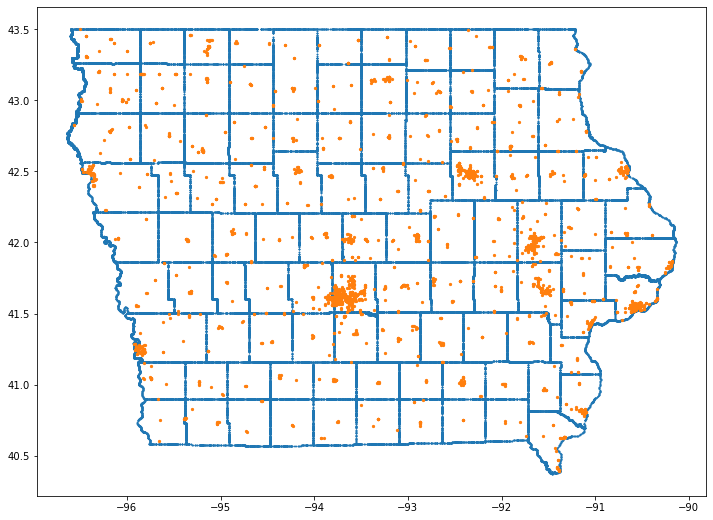

In [9]:
# Iowa county map + all stores (shutdown + running)
plt.figure(figsize = [12, 9])
plt.scatter(x=IA_county_boundary['Lng'], y=IA_county_boundary['Lat'], s=0.5)
plt.scatter(x=store_db['lng'], y=store_db['lat'], s=5)
plt.show()

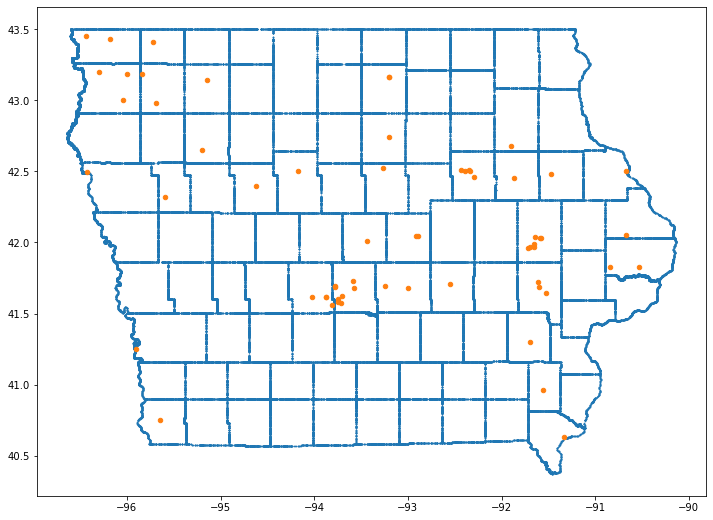

In [10]:
# Iowa county map + new stores (still running only)
plt.figure(figsize = [12, 9])
plt.scatter(x=IA_county_boundary['Lng'], y=IA_county_boundary['Lat'], s=0.5)
plt.scatter(x=store_db[(store_db['max'] >= '2022-01-01') & (store_db['min'] >= '2021-07-01')]['lng'], y=store_db[(store_db['max'] >= '2022-01-01') & (store_db['min'] >= '2021-07-01')]['lat'], s=20)
plt.show()

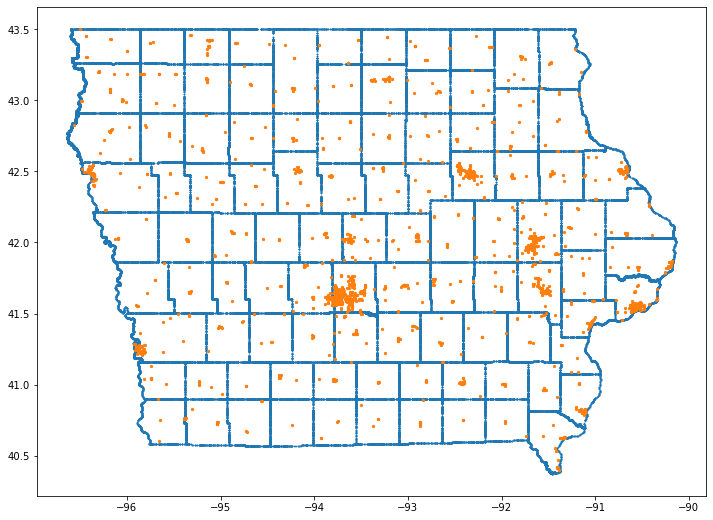

In [13]:
# Iowa county map + current existing
plt.figure(figsize = [12, 9])
plt.scatter(x=IA_county_boundary['Lng'], y=IA_county_boundary['Lat'], s=0.5)
plt.scatter(x=store_db[(store_db['max'] >= '2022-01-01')]['lng'], y=store_db[(store_db['max'] >= '2022-01-01')]['lat'], s=5)
plt.show()